# Esame Data Science - a.a. 2021/2022

Di seguitono sono proposti gli esercizi per la prova d'esame.
Per presentarsi all'esame è necessario aver implementato una soluzione per tutti e 3 gli esercizi.

1. [Esercizio Classificazioen](#esercizio1)
2. [Esercizio Serie Storica](#esercizio2)
3. [Predizione di malattie cardiache](#esercizio3)

In [1]:
import sys
import pandas as pd
import matplotlib.pyplot as plt
sys.path.append('../')

# es 1

from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

## Esercizio Classificazione
<a id="esercizio1"></a>

L'Organizzazione mondiale della sanità ha stimato che 12 milioni di decessi si verificano in tutto il mondo, ogni anno a causa di malattie cardiache. La metà dei decessi negli Stati Uniti e in altri paesi sviluppati è dovuta a malattie cardiovascolari. La prognosi precoce delle malattie cardiovascolari può aiutare a prendere decisioni sui cambiamenti dello stile di vita nei pazienti ad alto rischio e, a sua volta, ridurre le complicanze.

In questo esercizio si chiedere di utilizzare i decision tree (e magari i boosted decision trees) per individuare i fattori di rischio / delle malattie cardiache più rilevanti e prevedere il rischio complessivo utilizzando la regressione logistica.

Il dataset con i dati che useremo si trova nel filw `data/framingham.csv`. Il dataset contiene i seguenti dati:

Demografici:
- male: maschio o femmina (nominale)
- age: età del paziente (continua - Sebbene le età registrate siano state troncate a numeri interi, il concetto di età è continuo)

Comportamentali:
- currentSmoker: se il paziente sia o meno un fumatore attuale (nominale)
- cigsPerDay: il numero di sigarette che la persona ha fumato in media in un giorno (può essere considerato continuo in quanto si può avere un numero qualsiasi di sigarette, anche mezza sigaretta)

Storia medica:
- BPMeds: se il paziente assumeva o meno un farmaco per la pressione arteriosa (nominale)
- prevalentStroke: se il paziente ha avuto o meno un ictus (nominale)
- prevalentHyp: se il paziente è iperteso (nominale)
- diabetes: se il paziente ha o meno il diabete (nominale)

Situazione medica attuale:
- totChol: livello di colesterolo totale (continuo)
- sysBP: pressione arteriosa sistolica (continua)
- diaBP: pressione arteriosa diastolica (continua)
- BMI: indice di massa corporea (continuo)
- heartRate: frequenza cardiaca (continua - Nella ricerca medica, variabili come la frequenza cardiaca, sebbene in realtà discrete, sono comunque considerate continue a causa del gran numero di possibili valori)
- glucose: livello di glucosio (continuo)

Variabile che si vuole predire (target desiderato):
- TenYearCHD: Rischio di malattia coronarica nei prossimi 10 anni CHD (binario: '1' significa sì, '0' significa no)

Si richiede di leggere il dataset, fare una parte di statistica descrittiva e quindi di provare a creare un albero decisionale sui dati in esso contenuti per descrivere quali variabili influiscono maggiormente sul consumo alcolico nei ragazzi.

L'albero può essere troncato ad una profondità di qualche livello e deve essere allegato e discusso con alcune considerazioni sul dataset.

Dopo la realizzazione dell'albero, viene richiesto di disegnarlo e caricare l'immagine nel notebook (è possibile utilizzare il sito internet visto a lezione (http://webgraphviz.com).
I risultati ottenuti nell'albero devono essere quindi brevemente commentati.

In [2]:
framingham = pd.read_csv('../data/framingham.csv')
framingham.head(5)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


### Statistica descrittiva e studio del dataset

#### Type delle colonne

In [3]:
framingham.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [4]:
bool_features = ['male', 'currentSmoker', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'TenYearCHD']
for e in bool_features:
    framingham[e]=framingham[e].astype('bool')

#### Valori nulli

In [5]:
for column in framingham.columns:
    print(column + ' = ' + str(framingham[column].isna().sum())) 

male = 0
age = 0
education = 105
currentSmoker = 0
cigsPerDay = 29
BPMeds = 0
prevalentStroke = 0
prevalentHyp = 0
diabetes = 0
totChol = 50
sysBP = 0
diaBP = 0
BMI = 19
heartRate = 1
glucose = 388
TenYearCHD = 0


E' necessario prendere una decisione sul trattamento dei valori nulli:
 - non intervenire e lasciare il dataset così com'è
 - fillare i valori nulli con la media/mediana o altri valori che influiscano il meno possibile sulla distribuzione
 - rimuovere l'intera riga

#### Distribuzione variabili continue

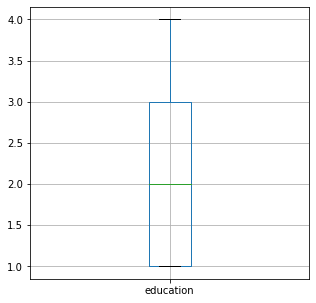

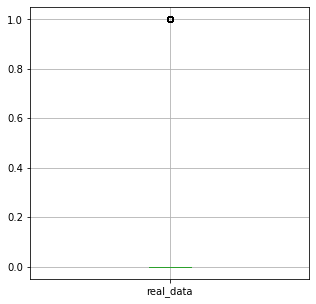

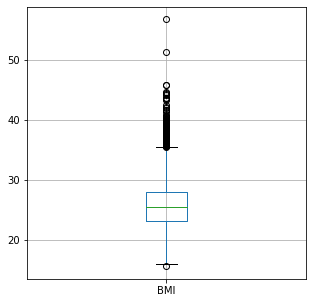

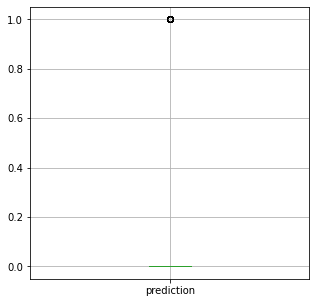

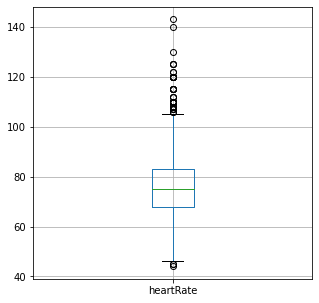

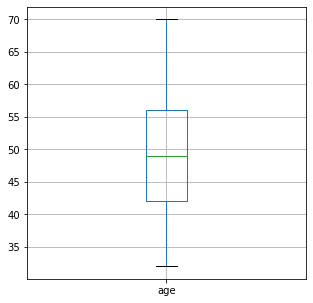

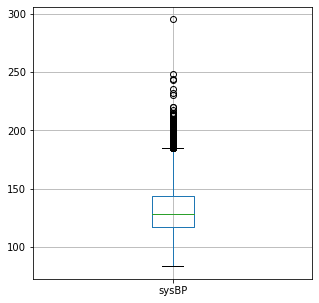

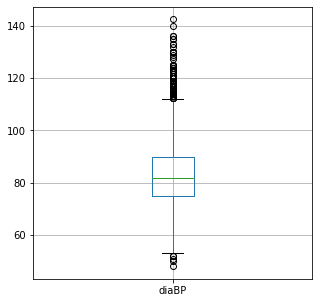

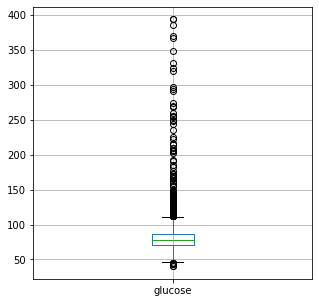

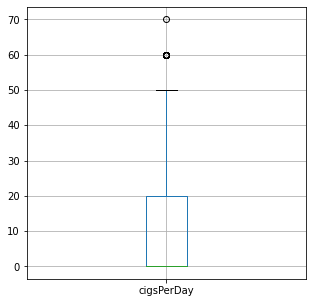

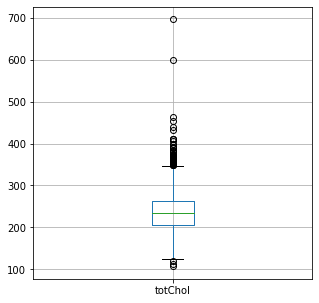

In [17]:
# Ricavo la lista delle variabili continue
continuous_features = list(set(framingham.columns) - set(bool_features))
for e in continuous_features:
    fig, ax = plt.subplots(figsize = (5,5)) 
    framingham.boxplot(column=e)

#### Distribuzione variabili booleane

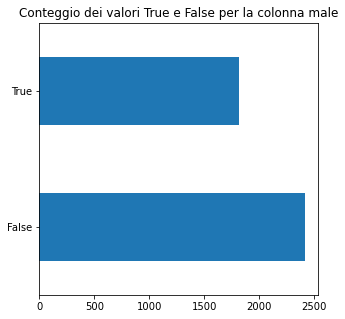

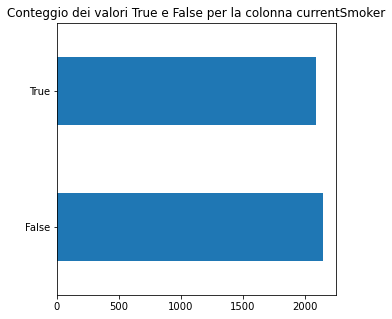

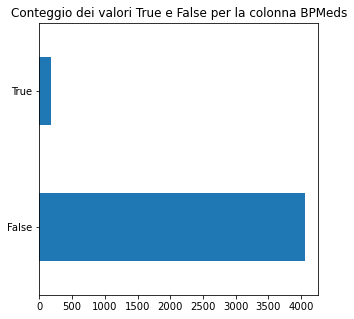

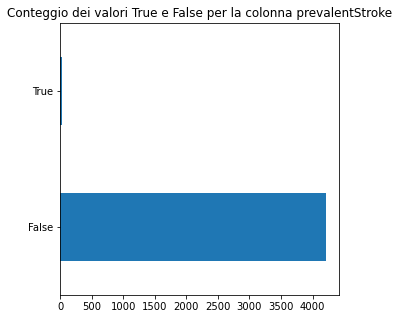

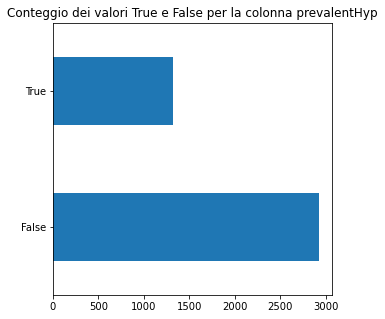

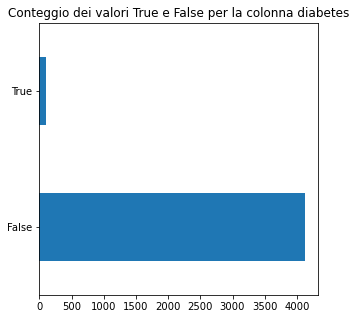

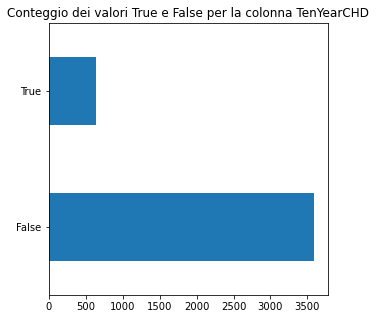

In [18]:
for e in bool_features:
    fig, ax = plt.subplots(figsize = (5,5))
    plt.title('Conteggio dei valori True e False per la colonna ' + e)
    framingham[e].value_counts().plot(kind='barh', stacked=True)

#### Correlazione

In [8]:
framingham.corr().style.background_gradient(cmap='coolwarm')

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
male,1.000000,-0.028979,0.017352,0.197596,0.317930,-0.061888,-0.004546,0.005313,0.015708,-0.070322,-0.035989,0.057933,0.081672,-0.116620,0.006083,0.088428
age,-0.028979,1.000000,-0.165883,-0.213748,-0.192791,0.130383,0.057655,0.307194,0.101258,0.262131,0.394302,0.206104,0.135800,-0.012823,0.122256,0.225256
education,0.017352,-0.165883,1.000000,0.018532,0.008085,-0.015759,-0.035112,-0.081970,-0.038680,-0.023115,-0.129631,-0.062316,-0.137504,-0.054206,-0.035721,-0.054059
currentSmoker,0.197596,-0.213748,0.018532,1.000000,0.769690,-0.048259,-0.032988,-0.103260,-0.044295,-0.046562,-0.130230,-0.107746,-0.167650,0.062356,-0.056826,0.019456
cigsPerDay,0.317930,-0.192791,0.008085,0.769690,1.000000,-0.042860,-0.032707,-0.066146,-0.037067,-0.026320,-0.088780,-0.056632,-0.092856,0.075157,-0.058960,0.057884
BPMeds,-0.061888,0.130383,-0.015759,-0.048259,-0.042860,1.000000,0.107138,0.232065,0.048042,0.072290,0.225971,0.164836,0.080912,0.013678,0.043815,0.082482
prevalentStroke,-0.004546,0.057655,-0.035112,-0.032988,-0.032707,0.107138,1.000000,0.074830,0.006949,0.000067,0.057009,0.045190,0.025891,-0.017676,0.018431,0.061810
prevalentHyp,0.005313,0.307194,-0.081970,-0.103260,-0.066146,0.232065,0.074830,1.000000,0.077808,0.163993,0.696755,0.615751,0.301318,0.147261,0.086834,0.177603
diabetes,0.015708,0.101258,-0.038680,-0.044295,-0.037067,0.048042,0.006949,0.077808,1.000000,0.040278,0.111283,0.050329,0.087036,0.048994,0.617627,0.097317
totChol,-0.070322,0.262131,-0.023115,-0.046562,-0.026320,0.072290,0.000067,0.163993,0.040278,1.000000,0.208908,0.165182,0.115767,0.091125,0.046408,0.082184


### Decision Tree

#### Divsione del dataset (train & test)

In [9]:
X = framingham.iloc[:,:-1]
X = pd.get_dummies(X, columns=X.columns)
y = framingham.TenYearCHD

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

#### Costruzione dell'albero

In [10]:
clf = DecisionTreeClassifier(max_depth=3)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

#### Predizione

In [11]:
d = framingham
d['prediction'] = clf.predict(X)
d['real_data'] = y

#### Valutazione del modello
- **Accuracy** : *percentuale delle previsioni esatte sul totale delle istanze. E' l'inverso del tasso di errore* 
- **Error** : *percentuale d'errore delle previsione sul totale delle istanze*
- **Precision**: *percentuale delle previsioni positive corrette sul totale delle previsioni positive del modello*
- **Recall**: *percentuale delle previsioni positive corrette sul totale delle istanze positive*

$$ Accuracy = \frac{TP + FP}{TP + FP + TN + FN} $$

In [12]:
print('L\'accuracy ottenuta dalla predizione del modello è pari a: \n' + \
      str(len(d[d['prediction'] == d['real_data']]) / len(d)))

L'accuracy ottenuta dalla predizione del modello è pari a: 
0.8482774893817838


$$ Error = \frac{FP + FN}{TP + FP + TN + FN} $$

In [13]:
print('L\'errore ottenuto dalla predizione del modello è pari a: \n' + \
      str(len(d[d['prediction'] != d['real_data']]) / len(d)))

L'errore ottenuto dalla predizione del modello è pari a: 
0.15172251061821615



$$ Precision = \frac{TP}{TP + FP} $$


In [14]:
print('La precision ottenuta dalla predizione del modello è pari a: \n' \
      + str(len(d[(d['prediction'] == True) & (d['real_data'] == True)]) \
            / (len(d[(d['prediction'] == True) & (d['real_data'] == True)]) \
               + len(d[(d['prediction'] == True) & (d['real_data'] == False)]))))

La precision ottenuta dalla predizione del modello è pari a: 
0.5142857142857142


$$ Recall = \frac{TP}{TP + FN} $$

In [15]:
print('La recall ottenuta dalla predizione del modello è pari a: \n' \
      + str(len(d[(d['prediction'] == True) & (d['real_data'] == True)]) \
            / (len(d[(d['prediction'] == True) & (d['real_data'] == True)]) \
               + len(d[(d['prediction'] == False) & (d['real_data'] == True)]))))

La recall ottenuta dalla predizione del modello è pari a: 
0.027950310559006212


#### Rappresentazione dell'albero con python

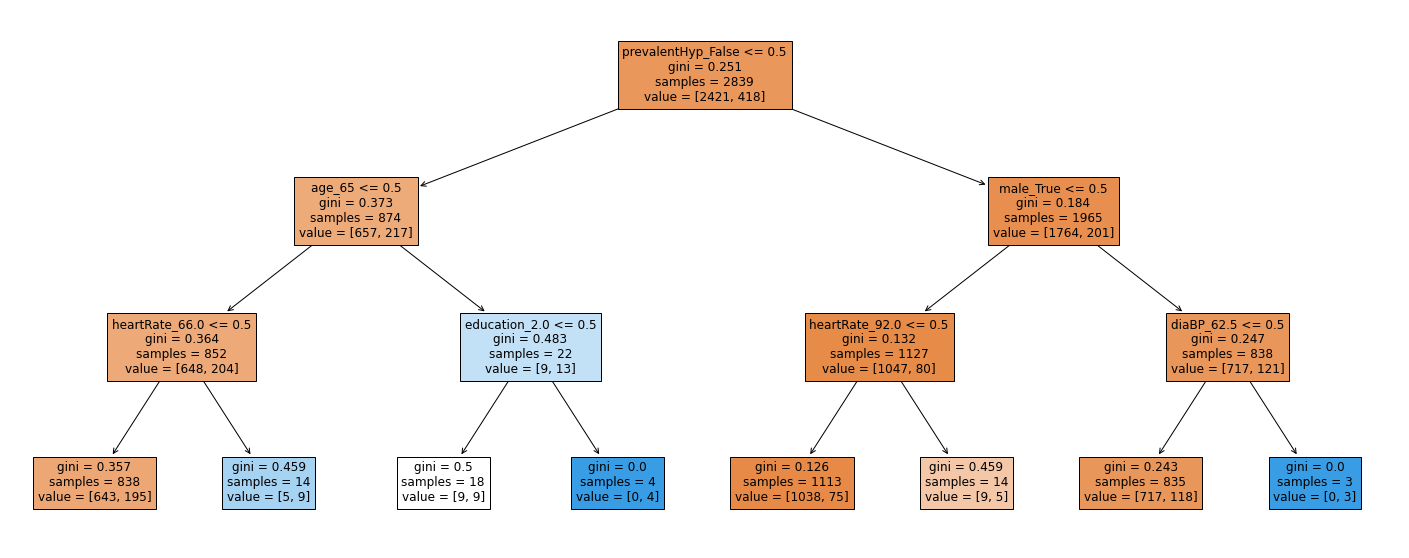

In [16]:
# Saper leggere l'albero 
# https://towardsdatascience.com/scikit-learn-decision-trees-explained-803f3812290d
fig = plt.figure(figsize=(25,10))
_ = tree.plot_tree(clf, 
                   feature_names=X.columns,
                   filled=True)

digraph {rankdir=LR;
	size="8,5"
	node [shape = circle]
    	fontname = "Helvetica-Oblique"
  "prevalentHyp:False" -> "age:65"
  "prevalentHyp:False" -> "male:True"
  "age:65" -> "heartRate:66.0"
  "age:65" -> "education:2.0"
  "male:True" -> "heartRate:92.0"
  "male:True" -> "diaBP:62.5"
}